# Fundamentals of Deep Learning

### Recurrent Neural Networks

#### Julián D. Arias Londoño and Raúl Ramos Pollán 

Dept. of Systems Engineering and Computer Science  
Universidad de Antioquia, Medellín, Colombia  
julian.ariasl@udea.edu.co, raul.ramos@udea.edu.co, 

In [1]:
%matplotlib inline

Recurrent Neural Networks (RNN) are a family of neural networks designed to process sequential data. This type of networks are specially suitable for problems where every sample is a sequence of objects (values) with statistical dependence among them.

![alt text](./Images/RNN2.png "Neuronas")

An alternative view of the network 

![alt text](./Images/RNN3.png "Neuronas")

RNNs can be designed to solve different learning paradigms, in other words, they are able to adapt to different data configurations.

![alt text](./Images/RNN-Topol.jpeg "Neuronas")

Image taken from <a href="http://karpathy.github.io/2015/05/21/rnn-effectiveness/">Andrej Karpathy</a>

Examples:

- 1. Conventional MLP
- 2. Caption generation
- 3. Sentiment analysis
- 4. Language translation
- 5. Time series prediction


According to the notation in the in Figure 2, the mathematical formulation of an Elman RNN with one hidden layer and one output layer is given by:

$${\bf{a}}^{(t)} = {\bf{b}} + {\bf{V}}{\bf{h}}^{(t-1)} + {\bf{U}}{\bf{x}}^{(t)},\\ {\bf{h}}^{(t)} = \tanh({\bf{a}}^{(t)}), \\ {\bf{o}}^{(t)} = {\bf{c}} + {\bf{W}}{\bf{h}}^{(t)}$$

where $\bf{V}$ is the weights matrix of the feedback loop. $\bf{U}$ is the  weights matrix of the inputs and $\bf{W}$ is the weights matrix that contects the **state** of the network with the output layer. $\bf{b}$ and $\bf{c}$ are the bias vectors for the hidden and output layers respectively. The ouput of the network ${\bf{y}}^{(t)}$ corresponds to the application of the activation function to the values ${\bf{o}}^{(t)}$.

### Backpropagation through time (BPTT)

The first step for training a RNN is to define the loss function. Let's consider a sequence of length $\tau$, the loss for that single sequence can be expressed as: 

$$L(\{ {\bf{y}}^{(1)},{\bf{y}}^{(2)},\cdots,{\bf{y}}^{(\tau)} \}, \{ {\bf{\hat{y}}}^{(1)},{\bf{\hat{y}}}^{(2)},\cdots,{\bf{\hat{y}}}^{(\tau)} \}) \\
L = \sum_t L^{(t)}$$

If for instance the loss function for output $i$ is $L^{(t)} = -\log \hat{y}_i^{(t)}$, then

$$(\nabla_{{\bf{o}}^{(t)}}L)_i = \frac{\partial L}{\partial o_i^{(t)}} = \frac{\partial L}{\partial L^{(t)}} \frac{\partial L^{(t)}}{\partial \hat{y}_i^{(t)}} \frac{\partial \hat{y}_i^{(t)}}{\partial o_i^{(t)}} = \hat{y}_i^{(t)} - 1 \\ \nabla_{{\bf{o}}^{(t)}}L = {\bf{y}}^{(t)} \odot ({\bf{\hat{y}}}^{(t)} - {\bf{1}} )$$

where $\odot$ is the Hadamard product. When $t=\tau$, ${\bf{h}}^{(\tau)}$ only has ${\bf{o}}^{(\tau)}$ as descendent, so its gradient is simple:

$$ \nabla_{{\bf{h}}^{(\tau)}} L = {\bf{W}}^T\nabla_{{\bf{o}}^{(\tau)}}L$$

From this two results we can iterate backward in time to back-propagate gradients through time. From $t=\tau-1$ down to $\tau = 1$, ${\bf{h}}^{(t)}$ has two descendents: ${\bf{h}}^{(t+1)}$ and ${\bf{o}}^{(t)}$, therefore its gradient is given by:   

$$ \nabla_{{\bf{h}}^{(t)}}L = \left( \frac{\partial {\bf{h}}^{(t+1)}}{\partial {\bf{h}}^{(t)}}\right)^T(\nabla_{{\bf{h}}^{(t+1)}} L) + \left(\frac{\partial {\bf{o}}^{(t)}}{\partial {\bf{h}}^{(t)}}\right)^T(\nabla_{{\bf{o}}^{(t)}}L) \\
\nabla_{{\bf{h}}^{(t)}}L = {\bf{V}}^T\text{diag} \left( 1 - \left( {\bf{h}}^{(t+1)} \right)^2\right)(\nabla_{{\bf{h}}^{(t+1)}} L) + {\bf{W}}^T(\nabla_{{\bf{o}}^{(t)}}L)$$

Based on the former results, the rest of the gradients can be calculated as:

$$ \nabla_{\bf{c}} L = \sum_t \left(\frac{\partial {\bf{o}}^{(t)}}{\partial {\bf{c}}}\right)^T \nabla_{{\bf{o}}^{(t)}}L$$

$$ \nabla_{\bf{b}} L = \sum_t \left(\frac{\partial {\bf{h}}^{(t)}}{\partial {\bf{b}}}\right)^T \nabla_{{\bf{h}}^{(t)}}L = \sum_t \text{diag}\left( 1 - \left( {\bf{h}}^{(t)} \right)^2\right)\nabla_{{\bf{h}}^{(t)}} L $$

$$\nabla_{{\bf W}}L = \sum_t \sum_i \left(  \frac{\partial L}{\partial o_i^{(t)}} \right)^T \nabla_{{\bf W}} o_i^{(t)} = \sum_t (\nabla_{{\bf{o}}^{(t)}}L){\bf{h}}^{(t)^T}$$

$$\nabla_{\bf V}L = \sum_t \text{diag}\left( 1 - \left( {\bf{h}}^{(t)} \right)^2\right)(\nabla_{{\bf{h}}^{(t)}} L){\bf{h}}^{(t-1)^T}$$

$$ \nabla_{\bf U}L = \sum_t \text{diag}\left( 1 - \left( {\bf{h}}^{(t)} \right)^2\right)(\nabla_{{\bf{h}}^{(t)}} L){\bf{x}}^{(t)^T} $$

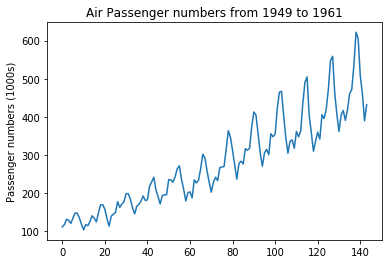

In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
datasetO = pandas.read_csv('data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(datasetO)
plt.ylabel('Passenger numbers (1000s)')
plt.title('Air Passenger numbers from 1949 to 1961')
plt.show()

In [28]:
datasetO[0:1]

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112


In [3]:
from libraries.DataPreparationRNN import split_sequence
from sklearn.preprocessing import MinMaxScaler
look_back=1
dataset = datasetO.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)
X_train, y_train = split_sequence(trainN, look_back)
X_test, y_test = split_sequence(testN, look_back)

In [30]:
print('Train',X_train[0:1,0:1])
print('Test',X_test[:1])

('Train', array([[[0.02588999]]], dtype=float32))
('Test', array([[[0.682848  ],
        [0.63754046]]], dtype=float32))


Let's do a first try using a MLP.

In [10]:

from tensorflow import keras

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed

from libraries.DataPreparationRNN import EstimaRMSE
from libraries.DataPreparationRNN import EstimaRMSE_RNN
from libraries.DataPreparationRNN import EstimaRMSE_MultiOuput
from libraries.DataPreparationRNN import EstimaRMSE_RNN_MultiStep
from libraries.DataPreparationRNN import EstimaRMSE_MultiStep
from libraries.DataPreparationRNN import EstimaRMSE_RNN_MultiStepEncoDeco
from libraries.DataPreparationRNN import PintaResultado
from libraries.DataPreparationRNN import create_dataset
from libraries.DataPreparationRNN import create_datasetMultipleTimesBackAhead

In [11]:
#keras.backend.clear_session()
model1 = Sequential()
model1.add(Dense(5,activation = 'relu',input_dim=1))
model1.add(Dense(1))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


Train Score: 71.95 RMSE
Test Score: 231.03 RMSE


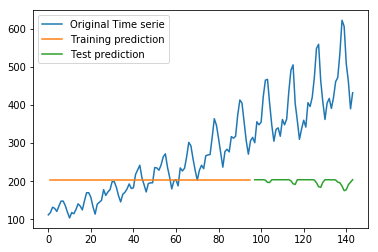

In [12]:
model1.compile(optimizer='adam',loss='mse')
model1.fit(X_train.reshape(X_train.shape[0],look_back),y_train.flatten(),epochs=200, verbose=0)
trainPredict, testPredict = EstimaRMSE(model1,X_train,X_test,y_train,y_test,scaler,look_back)
PintaResultado(dataset,trainPredict,testPredict,look_back)

Using two steps backward to predict one step ahead:

(96, 1) (94, 2, 1)
Train Score: 35.55 RMSE
Test Score: 83.18 RMSE


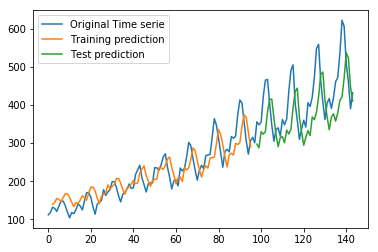

In [18]:
look_back = 2;
X_train, y_train = split_sequence(trainN, look_back)
X_test, y_test = split_sequence(testN, look_back)
print trainN.shape,X_train.shape
#keras.backend.clear_session()
model2 = Sequential()
model2.add(Dense(5,activation = 'relu',input_dim=look_back))
model2.add(Dense(1))
model2.compile(optimizer='adam',loss='mse')
model2.fit(X_train.reshape(X_train.shape[0],look_back),y_train.reshape(X_train.shape[0],1),epochs=200, verbose=0)
trainPredict, testPredict = EstimaRMSE(model2,X_train,X_test,y_train,y_test,scaler,look_back)
PintaResultado(dataset,trainPredict,testPredict,look_back)

In [21]:
X_train[0:1,:,:]


array([[[0.02588999],
        [0.04530746]]], dtype=float32)

In [31]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 5)                 15        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


Using three steps backward to predict one step ahead:

Train Score: 37.40 RMSE
Test Score: 96.72 RMSE


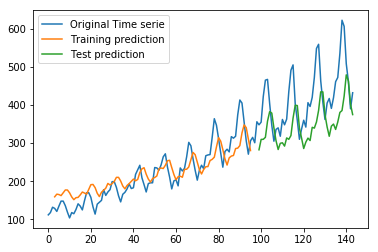

In [32]:
look_back = 3;
X_train, y_train = split_sequence(trainN, look_back)
X_test, y_test = split_sequence(testN, look_back)
model3 = Sequential()
model3.add(Dense(5,activation = 'relu',input_dim=look_back))
model3.add(Dense(1))
model3.compile(optimizer='adam',loss='mse')
model3.fit(X_train.reshape(X_train.shape[0],look_back),y_train.flatten(),epochs=200, verbose=0)
trainPredict, testPredict = EstimaRMSE(model3,X_train,X_test,y_train,y_test,scaler,look_back)
PintaResultado(dataset,trainPredict,testPredict,look_back)

In [33]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 5)                 20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 6         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


Take a look to the autocorrelation function:

/opt/miniconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/opt/miniconda/lib/python2.7/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:33: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import kalman_loglike
/opt/miniconda/lib/python2.7/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:33: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  from . import kalman_loglike


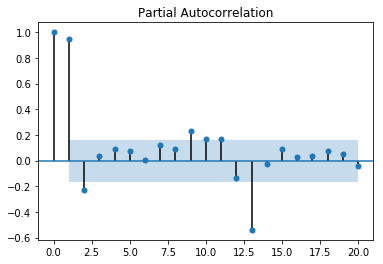

In [34]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(datasetO, lags=20)
plt.show()

There are problems where we have multiple time series to forecast one of them (**Multiple Input series**), or multiple time series to predict  all of them (**Multiple parallel series**)

**Arquitectures based on MLP**

Multiple Input Series

- Multiple Input: Combine the series at the input layer
- Multi-headed: One input layer per serie and the concatenation takes place in the output layer

Multiple parallel series

- Vector-output Model: Combine the series at the input layer and the output la layer contains one output per serie.
- Multi-output model: Combine the series at the input layer, share hidden layers and define a different output layer per serie.

## Now using a RNN layer instead of a Dense layer:

Input data must have the following structure: **[n_samples,n_times,n_features]**

Input: **[n_samples,1,1]**

Train Score: 22.69 RMSE
Test Score: 56.35 RMSE


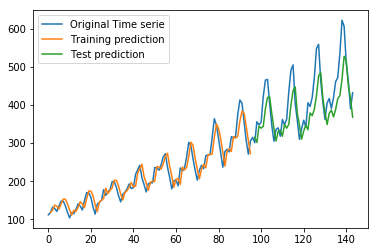

In [35]:
look_back = 1;
X_train, y_train = create_dataset(trainN, look_back)
X_test, y_test = create_dataset(testN, look_back)
model4 = Sequential()
model4.add(SimpleRNN(5,activation = 'relu',input_shape=(1,look_back)))
model4.add(Dense(1))
model4.compile(optimizer='adam',loss='mse')
model4.fit(X_train.reshape(X_train.shape[0],1,look_back),y_train.flatten(),epochs=500, verbose=0)
trainPredict, testPredict = EstimaRMSE_RNN(model4,X_train,X_test,y_train,y_test,scaler,look_back,1)
PintaResultado(dataset,trainPredict,testPredict,look_back)

In [36]:
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 5)                 35        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


### Using multiple times as features

Input: **[n_samples,1,2]**

Train Score: 22.19 RMSE
Test Score: 48.38 RMSE


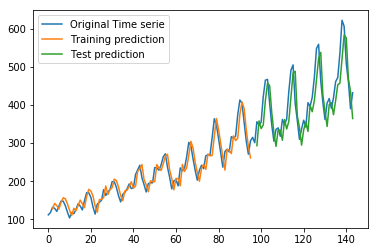

In [37]:
look_back = 2;
X_train, y_train = create_dataset(trainN, look_back)
X_test, y_test = create_dataset(testN, look_back)
model4b = Sequential()
model4b.add(SimpleRNN(5,activation = 'relu',input_shape=(1,look_back)))
model4b.add(Dense(1))
model4b.compile(optimizer='adam',loss='mse')
model4b.fit(X_train.reshape(X_train.shape[0],1,look_back),y_train.flatten(),epochs=500, verbose=0)
trainPredict, testPredict = EstimaRMSE_RNN(model4b,X_train,X_test,y_train,y_test,scaler,look_back,1)
PintaResultado(dataset,trainPredict,testPredict,look_back)

In [39]:

model4b.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 5)                 40        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


Using multiple times instead of multiple features:

### Using multiple times as multiple times!

Input: **[n_samples,2,1]**

Train Score: 39.83 RMSE
Test Score: 97.01 RMSE


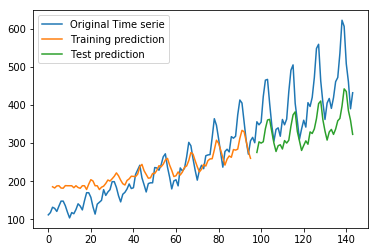

In [40]:
n_steps = 2;
X_train, y_train = create_dataset(trainN, n_steps)
X_test, y_test = create_dataset(testN, n_steps)
model6 = Sequential()
model6.add(SimpleRNN(5,activation = 'relu',input_shape=(n_steps,1)))
model6.add(Dense(1))
model6.compile(optimizer='adam',loss='mse')
model6.fit(X_train.reshape(X_train.shape[0],n_steps,1),y_train.flatten(),epochs=500, verbose=0)
trainPredict, testPredict = EstimaRMSE_RNN(model6,X_train,X_test,y_train,y_test,scaler,1,n_steps)
PintaResultado(dataset,trainPredict,testPredict,n_steps)

In [41]:
model6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


### Two recurrent layers:

![alt text](./Images/ReturnSeq.jpg "Neuronas")

Input: **[n_samples,1,1]**

**Option1**: Propagate the first layer and provide only the output of the last time step to the following layer:

Train Score: 22.75 RMSE
Test Score: 49.37 RMSE


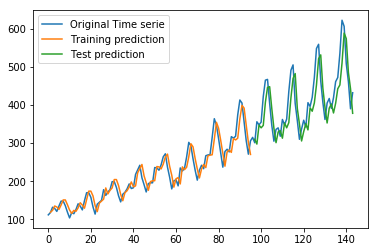

In [42]:
look_back = 1;
X_train, y_train = create_dataset(trainN, look_back)
X_test, y_test = create_dataset(testN, look_back)
model5 = Sequential()
model5.add(SimpleRNN(5,activation = 'relu',input_shape=(1,look_back)))
model5.add(RepeatVector(look_back))
model5.add(SimpleRNN(5,activation = 'relu'))
model5.add(Dense(1))
model5.compile(optimizer='adam',loss='mse')
model5.fit(X_train.reshape(X_train.shape[0],1,look_back),y_train.flatten(),epochs=500, verbose=0)
trainPredict, testPredict = EstimaRMSE_RNN(model5,X_train,X_test,y_train,y_test,scaler,look_back,1)
PintaResultado(dataset,trainPredict,testPredict,look_back)

In [43]:
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 5)              0         
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 5)                 55        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 6         
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


**Option2**: Propagate the first layer and provide every output of the first layer to the following layer:

Train Score: 22.70 RMSE
Test Score: 57.65 RMSE


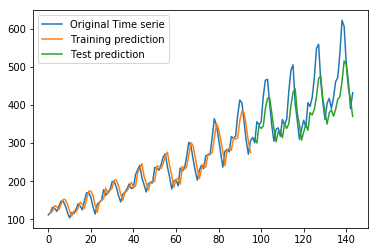

In [44]:
look_back = 1;
X_train, y_train = create_dataset(trainN, look_back)
X_test, y_test = create_dataset(testN, look_back)
model5b = Sequential()
model5b.add(SimpleRNN(5,activation = 'relu',return_sequences=True,input_shape=(1,look_back)))
model5b.add(SimpleRNN(5,activation = 'relu'))
model5b.add(Dense(1))
model5b.compile(optimizer='adam',loss='mse')
model5b.fit(X_train.reshape(X_train.shape[0],1,look_back),y_train.flatten(),epochs=500, verbose=0)
trainPredict, testPredict = EstimaRMSE_RNN(model5b,X_train,X_test,y_train,y_test,scaler,look_back,1)
PintaResultado(dataset,trainPredict,testPredict,look_back)

In [45]:
model5b.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 1, 5)              35        
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 5)                 55        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 6         
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


### Predicting several times ahead (many to many)

Let's see what happen with a Dense network:

Train Score: 37.40 RMSE
Test Score: 117.69 RMSE


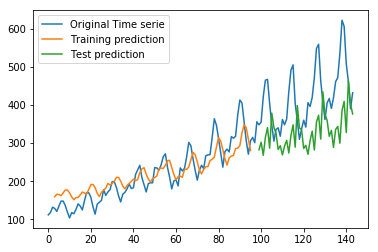

In [46]:
look_back = 3;
time_ahead = 3
X_train, y_train = split_sequence(trainN, look_back)
X_test, y_test = create_datasetMultipleTimesBackAhead(testN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
trainPredict, testPredict = EstimaRMSE_MultiStep(model3,X_train,X_test,y_train,y_test,scaler,look_back,time_ahead)
PintaResultado(dataset,trainPredict,testPredict,look_back)

### Now a dense network with multiple outputs

In [58]:
look_back = 3
time_ahead = 3
X_train, y_train = create_datasetMultipleTimesBackAhead(trainN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_train2, y_train2 = create_datasetMultipleTimesBackAhead(trainN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = 1)
X_test, y_test = create_datasetMultipleTimesBackAhead(testN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)

In [48]:
print('Train',X_train[:10])
print('Test',y_train[:10])

('Train', array([[0.02588999, 0.04530746, 0.09061491],
       [0.08090615, 0.05501619, 0.10032365],
       [0.14239484, 0.14239484, 0.10355988],
       [0.04854369, 0.        , 0.04530746],
       [0.03559873, 0.07119742, 0.11974111],
       [0.10032365, 0.06796119, 0.14563107],
       [0.21359226, 0.21359226, 0.17475727],
       [0.09385115, 0.03236246, 0.11650488],
       [0.13268611, 0.14886734, 0.2394822 ],
       [0.1909385 , 0.22006473, 0.2394822 ]], dtype=float32))
('Test', array([[0.08090615, 0.05501619, 0.10032365],
       [0.14239484, 0.14239484, 0.10355988],
       [0.04854369, 0.        , 0.04530746],
       [0.03559873, 0.07119742, 0.11974111],
       [0.10032365, 0.06796119, 0.14563107],
       [0.21359226, 0.21359226, 0.17475727],
       [0.09385115, 0.03236246, 0.11650488],
       [0.13268611, 0.14886734, 0.2394822 ],
       [0.1909385 , 0.22006473, 0.2394822 ],
       [0.3074434 , 0.3074434 , 0.25889972]], dtype=float32))


In [59]:
model7 = Sequential()
model7.add(Dense(10,activation = 'relu',input_dim=look_back))
model7.add(Dense(5,activation = 'relu'))
model7.add(Dense(time_ahead))
model7.compile(optimizer='adam',loss='mse')
model7.fit(X_train2,y_train2,epochs=200, verbose=0)

In [60]:
model7.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                40        
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 18        
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


Train Score: 27.24 RMSE
Test Score: 59.67 RMSE


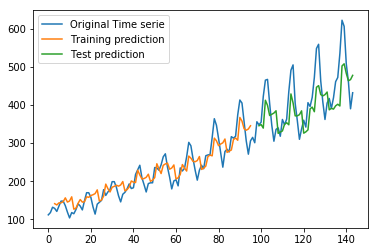

In [51]:
trainPredict, testPredict = EstimaRMSE_MultiOuput(model7,X_train,X_test,y_train,y_test,scaler,look_back)
PintaResultado(dataset,trainPredict,testPredict,look_back)

### Now using RNNs:

Input: **[n_samples,1,3]**

### Using multiple times as features

Train Score: 20.96 RMSE
Test Score: 96.39 RMSE


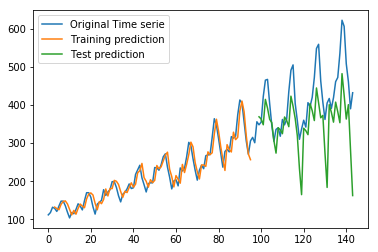

In [52]:
look_back = 3;
time_ahead = 3
X_train, y_train = split_sequence(trainN, look_back)
X_test, y_test = create_datasetMultipleTimesBackAhead(testN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
model4c = Sequential()
model4c.add(SimpleRNN(5,activation = 'relu',input_shape=(1,look_back)))
model4c.add(Dense(1))
model4c.compile(optimizer='adam',loss='mse')
model4c.fit(X_train.reshape(X_train.shape[0],1,look_back),y_train.flatten(),epochs=500, verbose=0)
trainPredict, testPredict = EstimaRMSE_RNN_MultiStep(model4c,X_train,X_test,y_train,y_test,scaler,look_back,time_ahead,1)
PintaResultado(dataset,trainPredict,testPredict,look_back)

In [53]:
model4c.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 5)                 45        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 6         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


### Using multiple times

Input: **[n_samples,3,1]**

Train Score: 21.75 RMSE
Test Score: 48.21 RMSE


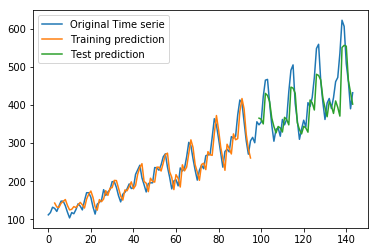

In [54]:
look_back = 3;
time_ahead = 3
X_train, y_train = split_sequence(trainN, look_back)
X_test, y_test = create_datasetMultipleTimesBackAhead(testN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
model6b = Sequential()
model6b.add(SimpleRNN(5,activation = 'relu',input_shape=(look_back,1)))
model6b.add(Dense(1))
model6b.compile(optimizer='adam',loss='mse')
model6b.fit(X_train.reshape(X_train.shape[0],look_back,1),y_train.flatten(),epochs=500, verbose=0)
trainPredict, testPredict = EstimaRMSE_RNN_MultiStep(model6b,X_train,X_test,y_train,y_test,scaler,look_back,time_ahead,0)
PintaResultado(dataset,trainPredict,testPredict,look_back)

In [55]:
model6b.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_8 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


## Encoder-Decoder architecture (sequence-to-sequence)

Input: **[n_samples,3,1]**

Ouput: **[n_samples,3,1]**

Train Score: 25.82 RMSE
Test Score: 81.73 RMSE


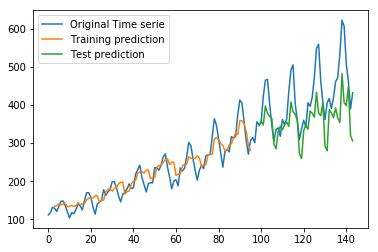

In [56]:
look_back = 3;
time_ahead = 3
X_train, y_train = create_datasetMultipleTimesBackAhead(trainN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
X_train2, y_train2 = create_datasetMultipleTimesBackAhead(trainN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = 1)
X_test, y_test = create_datasetMultipleTimesBackAhead(testN, n_steps_out=time_ahead, n_steps_in = look_back, overlap = time_ahead)
model8 = Sequential()
model8.add(SimpleRNN(5,activation = 'relu',input_shape=(look_back,1)))
model8.add(RepeatVector(time_ahead))
model8.add(SimpleRNN(5,activation = 'relu',return_sequences=True))
model8.add(TimeDistributed(Dense(1)))
model8.compile(optimizer='adam',loss='mse')
model8.fit(X_train2.reshape(X_train2.shape[0],look_back,1),y_train2.reshape(y_train2.shape[0],time_ahead,1),epochs=1000, verbose=0)
trainPredict, testPredict = EstimaRMSE_RNN_MultiStepEncoDeco(model8,X_train,X_test,y_train,y_test,scaler,look_back,time_ahead)
PintaResultado(dataset,trainPredict,testPredict,look_back)

In [57]:
model8.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_9 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 3, 5)              0         
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, 3, 5)              55        
_________________________________________________________________
time_distributed (TimeDistri (None, 3, 1)              6         
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________
